# Mosaic velocities from the same sensor / pass direction

Expected output:
+ vel_alos2_asc.h5
+ vel_s1_asc.h5
+ vel_s1_dsc.h5

In [1]:
%matplotlib inline
import os
import numpy as np
import platform
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from mintpy.utils import readfile, writefile, plot as pp
from mintpy.cli import image_stitch, mask, save_kmz, view
plt.rcParams.update({'font.size': 12})

# project dir
if platform.system() == 'Linux':
    proj_dir = os.path.expanduser('~/data/jinsha')          # on linux server
else:
    proj_dir = os.path.expanduser('~/data/china/jinsha')    # on macos/windows laptop

# working dir
os.chdir(proj_dir)
print('Go to directory:', proj_dir)

dem_file = os.path.join(proj_dir, 'DEM/copernicus.h5')

# datasets
ds_names = [
    ['alos2_a147_f510', 'alos2_a147_f520'],
    ['s1_a128', 's1_a026', 's1_a099', 's1_a172'],
    ['s1_d062', 's1_d135', 's1_d033', 's1_d106'],
][0]

# mosaic file suffix
dparts = ds_names[0].split('_')
suffix = f'{dparts[0]}_{dparts[1][0]}sc'
print(f'output mosaic file suffix: {suffix}')

Go to directory: /Users/yunjunz/data/china/jinsha
output mosaic file suffix: alos2_asc


## 1. Plot single track/frame velocity

for quality checking.

------------------------------1/2: alos2_a147_f510
view.py /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity.h5 velocity --mask /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_maskTempCoh.h5 --dem /Users/yunjunz/data/china/jinsha/DEM/copernicus.h5 -v -2 2 --lalo-label --ylabel-rot 90 --notitle --noverbose -o /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_a147_f510.png


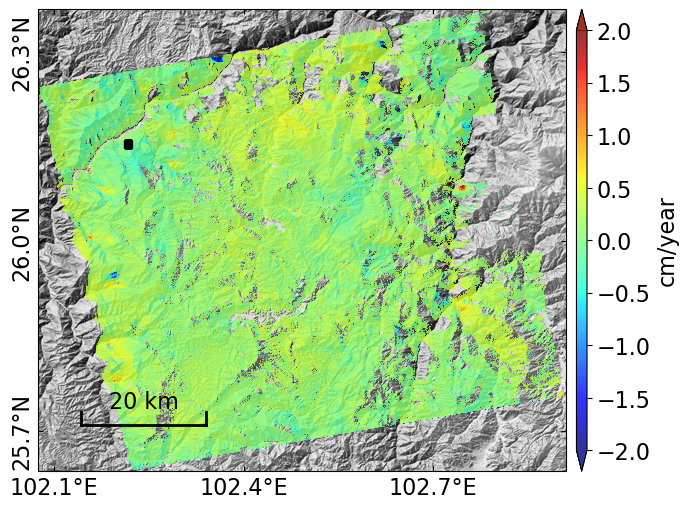

------------------------------2/2: alos2_a147_f520
view.py /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity.h5 velocity --mask /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_maskTempCoh.h5 --dem /Users/yunjunz/data/china/jinsha/DEM/copernicus.h5 -v -2 2 --lalo-label --ylabel-rot 90 --notitle --noverbose -o /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_a147_f520.png


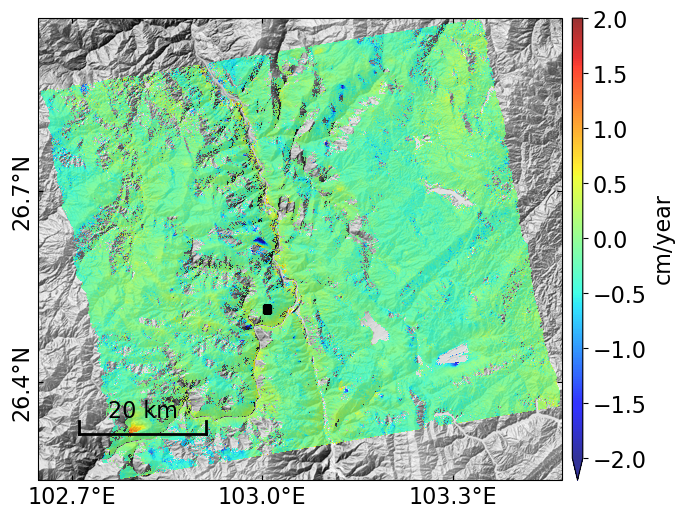

In [6]:
for i, ds_name in enumerate(ds_names):
    # file paths
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity.h5')
    msk_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_maskTempCoh.h5')
    png_file = os.path.join(proj_dir, f'velocity/pic/vel_{ds_name}.png')
    print('-'*30 + f'{i+1}/{len(ds_names)}: {ds_name}')

    # call view.py
    cmd = f'{vel_file} velocity --mask {msk_file} --dem {dem_file} '
    cmd += '-v -2 2 --lalo-label --ylabel-rot 90 '
    cmd += f'--notitle --noverbose -o {png_file} '
    view.main(cmd.split())

## 2. Mosaic all velocities

Output: ALOS2_ASC, S1_ASC, S1_DSC

### a. Mask

In [11]:
update_mode = True
for i, ds_name in enumerate(ds_names):
    # file paths
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity.h5')
    msk_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_maskTempCoh.h5')
    out_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity_msk.h5')
    print('-'*30 + f'{i+1}/{len(ds_names)}: {ds_name}')

    # run
    cmd = f'{vel_file} --mask {msk_file} -o {out_file}'
    if update_mode and os.path.isfile(out_file):
        print(f'output file exists: {out_file}, skip re-generating.')
    else:
        mask.main(cmd.split())

------------------------------1/2: alos2_a147_f510
output file exists: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5, skip re-generating.
------------------------------2/2: alos2_a147_f520
output file exists: /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5, skip re-generating.


### b. Mosaic

files to be stitched: ['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5']
datasets to be stitched: ['velocity']
##################################################
read velocity from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5
------------------------------
read data from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5
stitching ...
file 1: X_STEP - 0.00027151525175923987, Y_STEP - -0.0002850344179262041
file 2: X_STEP - 0.00030321717720230914, Y_STEP - -0.00026366723700311904
rescale the 2nd matrix into the same spatial resolution as the 1st one ...


/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlapping area
average offset between two matrices in the common area: -0.0013765640782736161
offset all pixel values in the 2nd matrix by -0.0013765640782736161 
create output metadata and matrix in shape of (4687, 5147)
update LENGTH/WIDTH: 4687/5147
update Y/X_FIRST: 26.97177146679721/102.0740295866124
update REF_Y/X: 2869/527
plot stitching & shifting result ...
figure size : [11.5, 8.4]
save figure to file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc_01.png
##################################################
delete exsited file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5
create HDF5 file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5 with w mode
create dataset /velocity of float32    in size of (4687, 5147)         with compression=None
finished writing to /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5
showing ...


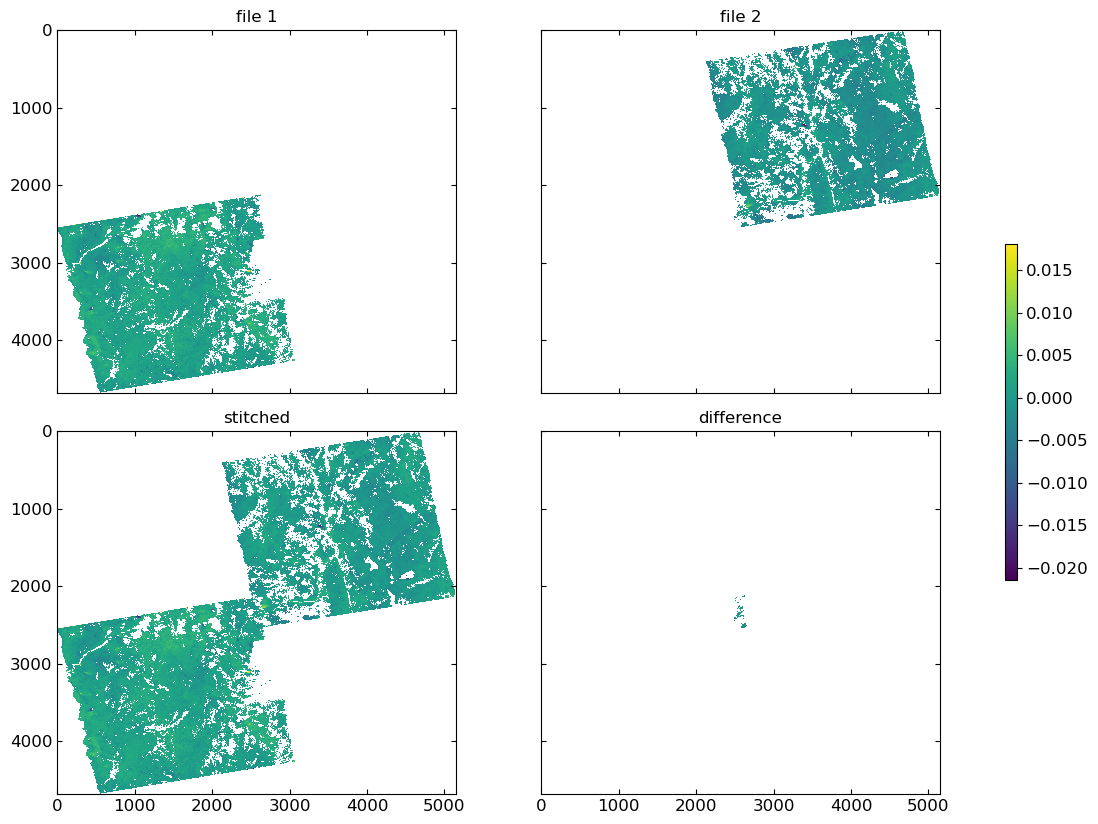

In [2]:
update_mode = False

# file paths
vel_files = [os.path.join(proj_dir, x, 'mintpy/geo/geo_velocity_msk.h5') for x in ds_names]
out_file = os.path.join(proj_dir, f'velocity/vel_{suffix}.h5')

# run
cmd = ' '.join(x for x in vel_files) + f' -o {out_file}'
if update_mode and os.path.isfile(out_file):
    print(f'output file exists: {out_file}, skip re-generating.')
else:
    image_stitch.main(cmd.split())

### c. Post-processing: plot and google_earth

view.py /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5 velocity --dem /Users/yunjunz/data/china/jinsha/DEM/copernicus.h5 -v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.2 0.85 0.05 --cbar-nbins 4 --notitle --noverbose -o /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.png


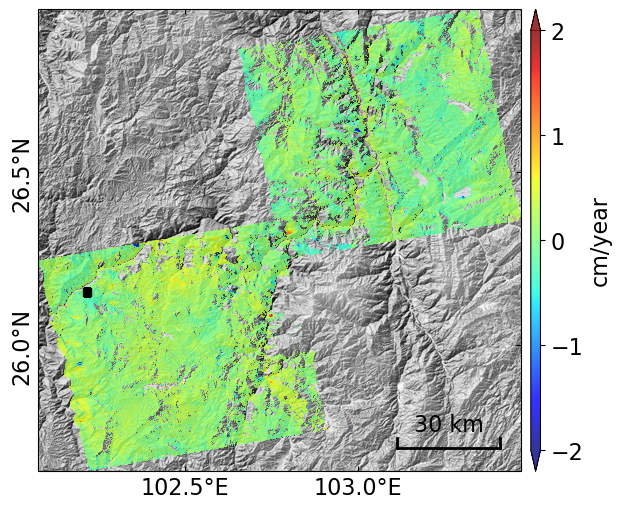

data   coverage in y/x: (0, 0, 5147, 4687)
subset coverage in y/x: (0, 0, 5147, 4687)
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 0/0/5147/4687
update Y/X_FIRST
update REF_Y/X
colormap: jet
plotting data ...
figure size : [12.6, 12.0]
show reference point
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_data.png with dpi=600
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_cbar.png
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kml
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kml
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_data.png
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_cbar.png
merged all files to /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kmz


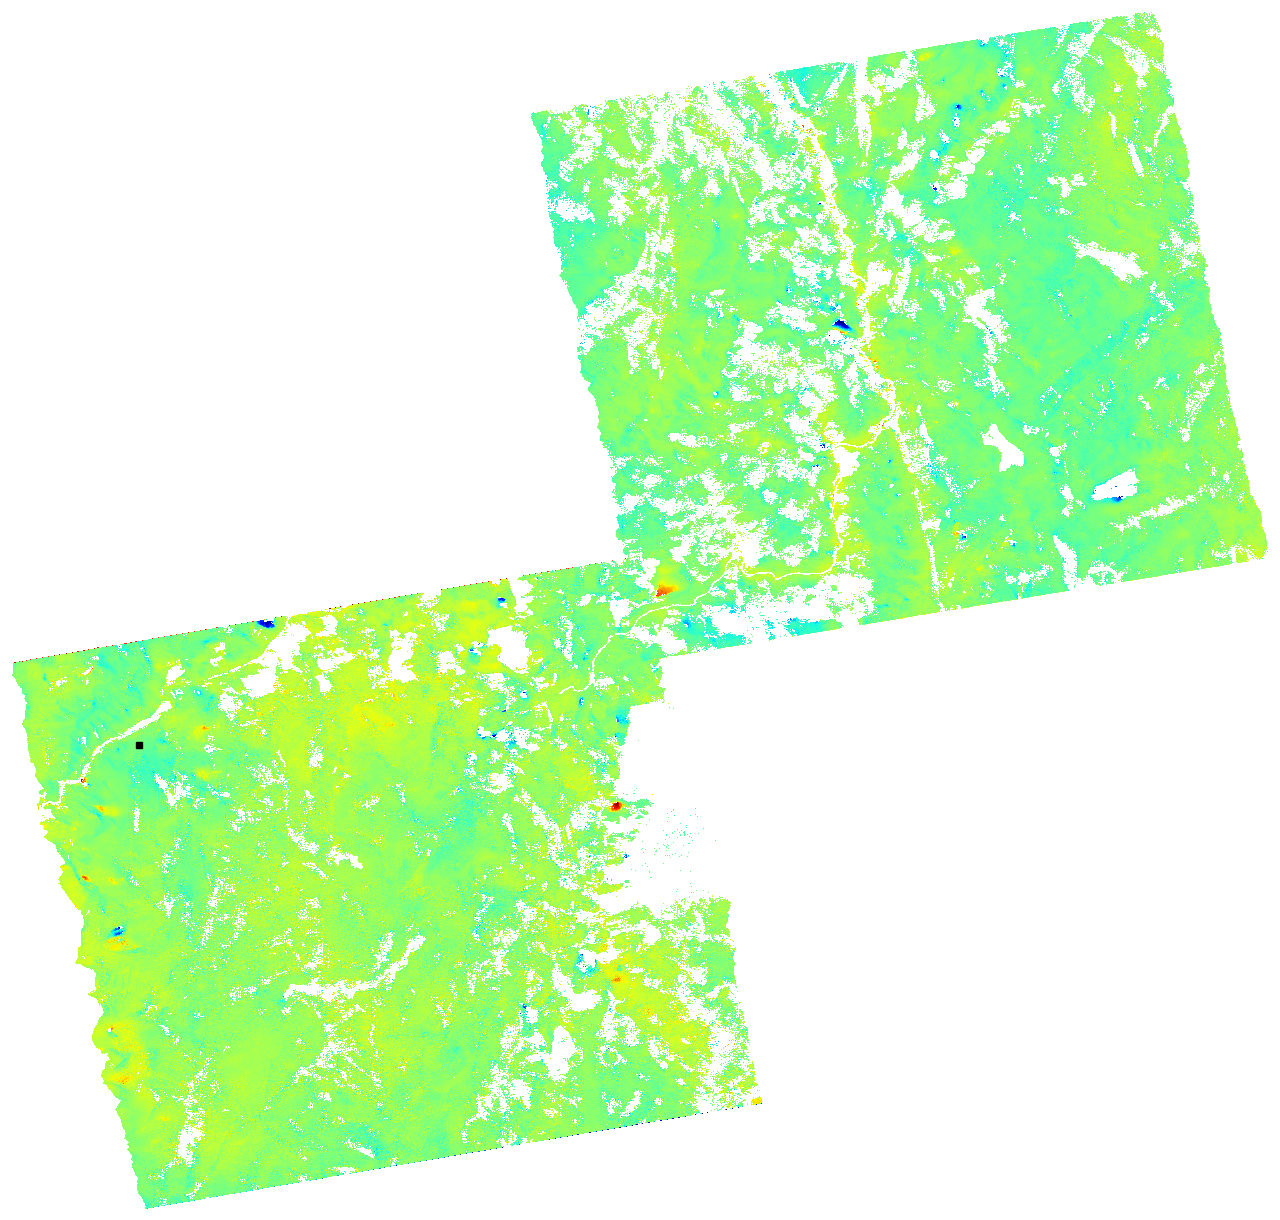

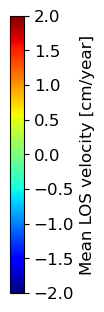

In [2]:
# file paths
vel_file = os.path.join(proj_dir, f'velocity/vel_{suffix}.h5')
png_file = os.path.join(proj_dir, f'velocity/pic/vel_{suffix}.png')
kmz_file = os.path.join(proj_dir, f'velocity/pic/vel_{suffix}.kmz')

# run view.py
cmd = f'{vel_file} velocity --dem {dem_file} '
cmd += '-v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.2 0.85 0.05 --cbar-nbins 4 '
cmd += f'--notitle --noverbose -o {png_file} '
view.main(cmd.split())

# run save_kmz.py
cmd = f'{vel_file} -u cm -v -2 2 -o {kmz_file}'
save_kmz.main(cmd.split())